<h1 align='center'> 영상처리 프로그래밍 실습 4</h1>

<h6 align='right'> 2022. 3. 31. </h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름: 김성문  &nbsp;&nbsp;          학번: 20175115   &nbsp;&nbsp;         학과(전공): 빅데이터전공
   
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 제출 마감: 4월 6일 (수) 오후 6:00까지 최종본을 SmartLEAD제출


In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
print("OpenCV version", cv2.__version__)
print("NumPy version", np.__version__)

OpenCV version 4.5.2
NumPy version 1.20.3


## 지난 주 예제 8.

In [11]:
white = (255, 255, 255)
img = cv2.imread("bird.png")

pt1 = np.array([30, 30])
rect = [300, 200]
img_a = img.copy()
cv2.rectangle(img_a, pt1, rect, white, cv2.LINE_4)

cropped_img = img[pt1[0]:pt1[0]+rect[1],pt1[1]:pt1[1]+rect[0],:]
cv2.imshow("Cropped", cropped_img)
cv2.imshow("Image", img_a)

while cv2.waitKey(0) != ord('q'):
    pass

cv2.destroyAllWindows()

## 지난 주 문제 1.

예제 8의 프로그램을 다음과 같이 수정하라.

1. 'Image' 윈도우에서 마우스 왼쪽 버튼을 클릭하면 그 위치가 하얀색 창의 왼쪽 위 꼭지점의 좌표를 지정하게 되고, 흰색 창의 크기가 변하고 흰색 창에 포함된 영상이 'Cropped' 윈도우에 표시된다.

2. 'Image' 윈도우에서 마우스 오른쪽 버튼을 클릭하면 그 위치가 하얀색 창의 오른쪽 아래 꼭지점의 좌표를 지정하게 되고, 흰색 창의 크기가 변하고 흰색 창에 포함된 영상이 'Cropped' 윈도우에 표시된다.

3. 'Cropped' 윈도우에서 왼쪽 마우스 버튼을 클릭하면 사용자에게 저장할 파일 이름을 입력받아서 'Cropped' 윈도우에 표시된 영상 부분을 별도의 파일로 저장한다.

In [18]:
def onMouseClick(event, x, y, flags, param):
    global pt1, pt2, img_a, cropped_img, clicked
    if event == cv2.EVENT_LBUTTONUP:
        pt1 = x, y
        clicked = clicked | LUP   
        if clicked == (LUP | RUP) :
            img_a = img.copy()
            cv2.rectangle(img_a, pt1, pt2, white, cv2.LINE_4)
            cropped_img = img[pt1[1]:pt2[1]+1, pt1[0]:pt2[0]+1,:]
            cv2.imshow("Cropped", cropped_img)
            cv2.imshow("Image", img_a)
            clicked = UNCLICKED
        else:
            img_a = img.copy()
            cv2.imshow('Image', img_a)


    elif event == cv2.EVENT_RBUTTONUP:
        pt2 = x, y
        clicked = clicked | RUP
        if clicked == (LUP | RUP) :
            img_a = img.copy()
            cv2.rectangle(img_a, pt1, pt2, white, cv2.LINE_4)
            cropped_img = img[pt1[1]:pt2[1]+1, pt1[0]:pt2[0]+1,:]
            cv2.imshow("Cropped", cropped_img)
            cv2.imshow("Image", img_a)
            clicked = UNCLICKED
        else:
            img_a = img.copy()
            cv2.imshow('Image', img_a)

            
def saveCroppedImage(event, x, y, flags, param):
    global cropped_img
    if event == cv2.EVENT_LBUTTONUP:
        file_name = input("Enter a file name:")
        cv2.imwrite(file_name, cropped_img)

white = (255, 255, 255)
img = cv2.imread("bird.png")

UNCLICKED = 0
LUP = 1
RUP = 2
clicked = UNCLICKED    # 아무것도 안 눌린 상태

# 초기위치
pt1 = np.array([img.shape[1]//4, img.shape[0]//4]) # (x, y)
pt2 = np.array([-img.shape[1]//4, -img.shape[0]//4])


img_a = img.copy()

#cv2.namedWindow("Image", cv2.WINDOW_GUI_NORMAL)
cv2.namedWindow("Cropped", cv2.WINDOW_GUI_NORMAL)      # NORMAL은 tool bar가 없어짐
cv2.imshow("Image", img_a)

cv2.setMouseCallback("Image", onMouseClick)
cv2.setMouseCallback("Cropped", saveCroppedImage)
while cv2.waitKey(0) != ord('q'):
    pass


cv2.destroyAllWindows()

## NumPy의 다차원 배열의 axis 이해하기

In [116]:
arr = np.arange(1, 121, 2)
arr.shape

(60,)

In [72]:
arr

array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119])

In [73]:
arr.shape

(60,)

- arr을 shape이 (3, 4, 5)인 배열의 view를 arr3라 하고, arr3를 만들어라.

In [74]:
arr3 = arr.reshape(-1,4,5)    # shape정보만 들어있고 arr의 데이터를 참조
arr3

array([[[  1,   3,   5,   7,   9],
        [ 11,  13,  15,  17,  19],
        [ 21,  23,  25,  27,  29],
        [ 31,  33,  35,  37,  39]],

       [[ 41,  43,  45,  47,  49],
        [ 51,  53,  55,  57,  59],
        [ 61,  63,  65,  67,  69],
        [ 71,  73,  75,  77,  79]],

       [[ 81,  83,  85,  87,  89],
        [ 91,  93,  95,  97,  99],
        [101, 103, 105, 107, 109],
        [111, 113, 115, 117, 119]]])

In [75]:
arr2 = np.copy(arr)  
arr2 

array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119])

In [76]:
arr[0] = 200
arr3

array([[[200,   3,   5,   7,   9],
        [ 11,  13,  15,  17,  19],
        [ 21,  23,  25,  27,  29],
        [ 31,  33,  35,  37,  39]],

       [[ 41,  43,  45,  47,  49],
        [ 51,  53,  55,  57,  59],
        [ 61,  63,  65,  67,  69],
        [ 71,  73,  75,  77,  79]],

       [[ 81,  83,  85,  87,  89],
        [ 91,  93,  95,  97,  99],
        [101, 103, 105, 107, 109],
        [111, 113, 115, 117, 119]]])

In [79]:
arr2   # copy를 이용하여 만들었기 때문에 arr이 변해도 변화 X
arr2 = arr2.reshape(3,4,5)
arr2

array([[[  1,   3,   5,   7,   9],
        [ 11,  13,  15,  17,  19],
        [ 21,  23,  25,  27,  29],
        [ 31,  33,  35,  37,  39]],

       [[ 41,  43,  45,  47,  49],
        [ 51,  53,  55,  57,  59],
        [ 61,  63,  65,  67,  69],
        [ 71,  73,  75,  77,  79]],

       [[ 81,  83,  85,  87,  89],
        [ 91,  93,  95,  97,  99],
        [101, 103, 105, 107, 109],
        [111, 113, 115, 117, 119]]])

- np.sum() 함수를 이용하여 61, 63, 65, 67, 69의 합 325 구하기

In [80]:
np.sum(arr3, axis = 2) # axis 방향으로 더함

array([[224,  75, 125, 175],
       [225, 275, 325, 375],
       [425, 475, 525, 575]])

In [ ]:
np.sum(arr3, 2)[1, 2] 

- np.sum() 함수를 이용하여 47, 57, 67, 77의 합 248 구하기

In [43]:
np.sum(arr3, 1)

array([[ 64,  72,  80,  88,  96],
       [224, 232, 240, 248, 256],
       [384, 392, 400, 408, 416]])

In [40]:
np.sum(arr3, 1)[1, 3]

248

- np.sum() 함수를 이용하여 15, 55, 95의 합 165 구하기

In [46]:
np.sum(arr3, 0)

array([[123, 129, 135, 141, 147],
       [153, 159, 165, 171, 177],
       [183, 189, 195, 201, 207],
       [213, 219, 225, 231, 237]])

In [45]:
np.sum(arr3, 0)[1, 2]

165

# NumPy ndarray 객체 구조 이해

### NumPy 데이터 타입 이해
```
getsizeof(...)
    getsizeof(object [, default]) -> int
    
    Return the size of object in bytes.
```

In [ ]:
help(sys.getsizeof) 

## 예제 1. 
sys.getsizeof() 함수를 사용하여 ndarray의 원소의 개수에 따른 객체의 크기 확인하기


In [47]:
import sys

In [48]:
def info_array(arr):
    print(arr)
    print("dtype:", arr.dtype)
    print("size:", sys.getsizeof(arr))
    print("id:", id(arr))

#### 1.1 빈 ndarray 객체의 크기는 얼마인가?

In [49]:
empty_array = np.array([])
info_array(empty_array)

[]
dtype: float64
size: 104
id: 2436536879312


#### 1.2 ndarray의 dtype에 따른 ndarray 객체의 크기 살펴 보기

In [53]:
# 8bit = 1byte
i32_array = np.arange(4, dtype=np.int16)  
info_array(i32_array)  # 기본 104바이트에 8바이트를 더함

[0 1 2 3]
dtype: int16
size: 112
id: 2436536878736


In [54]:
#32-bit integer
i32_array = np.arange(4, dtype= np.int32)
info_array(i32_array)  # 104byte + 16byte = 120byte

[0 1 2 3]
dtype: int32
size: 120
id: 2436536880464


In [85]:
#64-bit integer
i64_array = np.arange(4, dtype=np.int64)
info_array(i64_array)   # 104byte + 32byte = 136byte

[0 1 2 3]
dtype: int64
size: 136
id: 2436536978192


In [84]:
#8-bit unsigned integer
u8_array = np.arange(4, dtype= np.uint8)
info_array(u8_array)    # 104byte + 8byte = 108byte

[0 1 2 3]
dtype: uint8
size: 108
id: 2436536977616


In [94]:
#16-bit floating
f16_array = np.arange(4, dtype=np.float16)
info_array(f16_array)

[0. 1. 2. 3.]
dtype: float16
size: 112
id: 2436536880848


In [88]:
#32-bit floating
f32_array = np.arange(4, dtype=np.float32)
info_array(f32_array)

[0. 1. 2. 3.]
dtype: float32
size: 120
id: 2436536978000


In [89]:
#64-bit floating
f64_array = np.arange(4, dtype=np.float64)
info_array(f64_array)

[0. 1. 2. 3.]
dtype: float64
size: 136
id: 2436536978096


## 예제 2. 
sys.getsizeof() 함수를 사용하여 ndarray의 원소의 개수에 따른 객체의 크기 확인하기cv


## 예제 3. 
sys.getsizeof() 함수를 사용하여 ndarray와 view 객체의 크기 확인하기


In [95]:
x = np.arange(24)
y = x.reshape(2,3,4)
y

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [99]:
x.size, y.size  # 원소의 개수

(24, 24)

In [100]:
y

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [101]:
info_array(x)  # 104+96

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
dtype: int32
size: 200
id: 2436537034384


In [111]:
info_array(y)  # reshape으로 만들어진 array는 empty array와 같다. 데이터는 참조를 한다

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
dtype: int32
size: 136
id: 2436537034192


In [104]:
a1 = np.array([])
a2 = np.array([[]])
a3 = np.array([[[]]])

In [105]:
a1.shape, a2.shape, a3.shape

((0,), (1, 0), (1, 1, 0))

In [109]:
info_array(a1)

[]
dtype: float64
size: 104
id: 2436536540784


In [112]:
info_array(a2)  # +16byte

[]
dtype: float64
size: 120
id: 2436537034672


In [113]:
info_array(a3)  # +16byte

[]
dtype: float64
size: 136
id: 2436537033328


In [120]:
info_array(x[10:15])  # 1차원 빈 array의 size와 같다

[10 11 12 13 14]
dtype: int32
size: 104
id: 2436565658384


In [122]:
x[10:15]   # 빈 껍데기 객체에 다른 배열의 데이터를 참조

array([10, 11, 12, 13, 14])

In [123]:
x1 = x[10:15] 
x1

array([10, 11, 12, 13, 14])

In [126]:
x1[0] += 100
x1 

array([210,  11,  12,  13,  14])

In [128]:
x    # 참조되던 데이터가 변함

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9, 210,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23])

### NumPy view를 이용한 image cropping

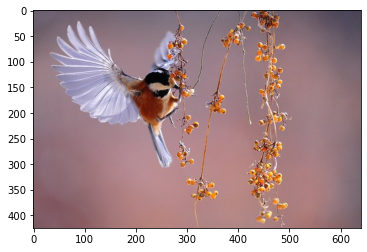

In [114]:
img = plt.imread('bird.png')
plt.imshow(img)

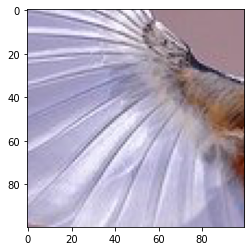

In [129]:
img_cropped = img[100:200,100:200,::]
plt.imshow(img_cropped)

In [131]:
sys.getsizeof(img), sys.getsizeof(img_cropped)  # 빈 껍데기이기 때문에 size가 작음. 메모리 효율 up

(4352136, 136)

In [132]:
img.shape

(425, 640, 4)

In [133]:
sys.getsizeof(img)

4352136

In [134]:
sys.getsizeof(cropped_img)

136

In [135]:
sys.getsizeof(np.array([])), sys.getsizeof(np.array([[]])), sys.getsizeof(np.array([[[]]]))

(104, 120, 136)

In [137]:
img1 = img[100:200,100:200,:]
print(id(img1))
img2 = img[200:300,200:300,:]
print(id(img2))

2436536541072
2436565658384


In [141]:
x = np.arange(4, dtype=np.int32)
x

array([0, 1, 2, 3])

In [144]:
y = x.view(dtype=np.uint8)
y   # 4개로 분해가 됨. indian마다 다르게 나옴

array([0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0], dtype=uint8)

In [145]:
sys.getsizeof(x), sys.getsizeof(y)

(120, 104)

In [146]:
x = np.arange(8, dtype=np.int32)
y = x.view(dtype=np.uint8)
y

array([0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 5, 0,
       0, 0, 6, 0, 0, 0, 7, 0, 0, 0], dtype=uint8)

In [147]:
sys.getsizeof(x), sys.getsizeof(y)

(136, 104)

In [148]:
empty_arr = np.array([], dtype=np.int32)
sys.getsizeof(empty_arr)

104

## NumPy 브로드캐스팅 연습

In [166]:
a = np.arange(1, 7).reshape(2,3)
a

array([[1, 2, 3],
       [4, 5, 6]])

####  배열 a와 연산 가능한 배열의 shape을 모두 적어라

In [153]:
b = np.arange(11, 17).reshape(2,3)
b
a+b

array([[12, 14, 16],
       [18, 20, 22]])

In [152]:
# scalar
a + 3

array([[4, 5, 6],
       [7, 8, 9]])

In [167]:
# (1,1)
b = np.array([[10]])
b.shape
a + b

array([[11, 12, 13],
       [14, 15, 16]])

In [157]:
# (1, 3) 배열
b = np.array([[1,3,5]])
b.shape

(1, 3)

In [158]:
a + b

array([[ 2,  5,  8],
       [ 5,  8, 11]])

In [159]:
b = np.array([[1], [3]])
b.shape

(2, 1)

In [161]:
a + b

array([[2, 3, 4],
       [7, 8, 9]])

In [162]:
a = np.arange(24).reshape(2,3,4)
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [163]:
a = np.arange(5).reshape(1,5)
a

array([[0, 1, 2, 3, 4]])

In [169]:
a + np.array([[3]])

array([[3, 4, 5, 6, 7]])

In [171]:
a

array([[0, 1, 2, 3, 4]])

In [172]:
b = np.array([[3], [4], [5]])
b

array([[3],
       [4],
       [5]])

In [173]:
#(3,1)
a + b

array([[3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8],
       [5, 6, 7, 8, 9]])

## 문제 1.
다음 조건을 모두 만족하는 프로그램을 작성하라.

1. 'bird.png' 파일을 읽고, cv2.imshow 함수를 이용하여 "Image" title을 가진 윈도우에 영상을 표시한다.
2. cv2.namedWindow("Cropped", 0) 으로 윈도우를 만든다.
3. "Image" 윈도우 위에 마우스 왼쪽 버튼을 누른 상태로 마우스를 움직이면 처음 마우스를 누른 위치가 사각형의 꼭지점이고 현재 마우스의 위치가 대각선 꼭지점인 사각형이 나타난다. 마우스를 움직이면 사각형의 크기가 계속 변한다.
4. 마우스의 왼쪽 버튼을 놓으면(release) 현재 사각형 내부의 영상이 "Cropped" 윈도우에 나타난다.
5. 새 위치에 마우스 왼쪽 버튼을 누르면 3 번 동작이 반복된다.
6. 'q'를 누르면 모든 윈도우가 닫히고 프로그램이 종료된다.

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
print("OpenCV version", cv2.__version__)
print("NumPy version", np.__version__)

OpenCV version 4.5.2
NumPy version 1.20.3


In [9]:
def onMouseDrag(event, x, y, flags, param):
    global pt1, pt2, img_a, cropped_img, clicked
    if event == cv2.EVENT_LBUTTONDOWN:
        if clicked == UNCLICKED:
            pt1 = [x, y]
            clicked = CLICKED    
            
    elif event == cv2.EVENT_MOUSEMOVE:
        if clicked == CLICKED:
            img_a = img.copy()
            cv2.rectangle(img_a, pt1, (x,y), white, cv2.LINE_4)
            cv2.imshow("Image", img_a)
            
    elif event == cv2.EVENT_LBUTTONUP:
        clicked = UNCLICKED                             # 마우스를 때면 상태 변경
        pt2 = [x, y]
        cv2.rectangle(img_a,pt1,(x,y),white, cv2.LINE_4)
        cropped_img = img[pt1[1]:pt2[1]+1, pt1[0]:pt2[0]+1,:]
        cv2.imshow("Image", img_a)
        cv2.imshow("Cropped", cropped_img)
    
    
def saveCroppedImage(event, x, y, flags, param):
    global cropped_img
    if event == cv2.EVENT_LBUTTONUP:
        file_name = input("Enter a file name:")
        cv2.imwrite(file_name, cropped_img)
    

white = (255, 255, 255)
img = cv2.imread("bird.png")

UNCLICKED = 0
CLICKED = 1
clicked = UNCLICKED    # 아무것도 안 눌린 상태

img_a = img.copy()

cv2.namedWindow("Cropped", 0)   
cv2.imshow("Image", img_a)

cv2.setMouseCallback("Image", onMouseDrag)
cv2.setMouseCallback("Cropped", saveCroppedImage)
while cv2.waitKey(0) != ord('q'):
    pass

cv2.destroyAllWindows()

## 문제 2.

문제 1에서 원영상을 표현하는 3차원 배열에서 index slicing을 적용하여 crop된 영상 데이터 배열을 표현하는 경우에 copy() 함수를 사용하는 경우에 비해서 어떤 장점이 있는지 생각해서 적어보아라.

참고: https://pythonspeed.com/articles/numpy-memory-views/

- copy 함수를 이용하면 새로운 메모리를 할당하여 똑같은 배열의 데이터를 새로 생성하게된다. 때문에 기존 영상이 바뀌어도 copy된 영상은 바뀌지않는다.<br>
    그러나 index slicing을 적용한 영상은 원 영상의 데이터를 참조하기 때문에 원 영상이 바뀌게되면 index slicing을 이용하여 만든 영상도 바뀌게 된다.
- 따라서 index slicing을 이용하여 영상 데이터 배열을 표현하면 메모리를 아낄 수 있게된다.

In [217]:
a = np.arange(24)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [218]:
b = np.copy(a)
b

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [220]:
c = a[:]
c

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [223]:
a[0] = 10
b

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [224]:
c

array([10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])